**About Dataset**

Dataset: Supply Chain Data

**Source:** [Kaggle - Supply Chain Data](https://www.kaggle.com/datasets/harshsingh2209/supply-chain-analysis)

**Overview**

Supply chain analytics is a valuable part of data-driven decision-making in various industries such as manufacturing, retail, healthcare, and logistics. It is the process of collecting, analyzing and interpreting data related to the movement of products and services from suppliers to customers.

In this project, I focus on the Fulfillment Rate KPI, aiming to identify potential causes of low fulfillment and provide recommendations to improve it. This project is part of my data analyst portfolio, where I focus on operational and efficiency metrics for the beauty supply chain.

**Key Features:**

- `Order quantities` 
- `Stock levels` 
- `Availability`
- `Lead time`
- `Shipping times`



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/kaggle/input/supply-chain-data/supply_chain_data.csv')
df

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,Mumbai,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,Kolkata,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,Delhi,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,haircare,SKU95,77.903927,65,672,7386.363944,Unknown,15,14,26,...,Mumbai,18,450,26,58.890686,Pending,1.210882,Air,Route A,778.864241
96,cosmetics,SKU96,24.423131,29,324,7698.424766,Non-binary,67,2,32,...,Mumbai,28,648,28,17.803756,Pending,3.872048,Road,Route A,188.742141
97,haircare,SKU97,3.526111,56,62,4370.916580,Male,46,19,4,...,Mumbai,10,535,13,65.765156,Fail,3.376238,Road,Route A,540.132423
98,skincare,SKU98,19.754605,43,913,8525.952560,Female,53,1,27,...,Chennai,28,581,9,5.604691,Pending,2.908122,Rail,Route A,882.198864


**Data Understanding and Cleaning**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product type             100 non-null    object 
 1   SKU                      100 non-null    object 
 2   Price                    100 non-null    float64
 3   Availability             100 non-null    int64  
 4   Number of products sold  100 non-null    int64  
 5   Revenue generated        100 non-null    float64
 6   Customer demographics    100 non-null    object 
 7   Stock levels             100 non-null    int64  
 8   Lead times               100 non-null    int64  
 9   Order quantities         100 non-null    int64  
 10  Shipping times           100 non-null    int64  
 11  Shipping carriers        100 non-null    object 
 12  Shipping costs           100 non-null    float64
 13  Supplier name            100 non-null    object 
 14  Location                 10

In [4]:
df.isna().sum()

Product type               0
SKU                        0
Price                      0
Availability               0
Number of products sold    0
Revenue generated          0
Customer demographics      0
Stock levels               0
Lead times                 0
Order quantities           0
Shipping times             0
Shipping carriers          0
Shipping costs             0
Supplier name              0
Location                   0
Lead time                  0
Production volumes         0
Manufacturing lead time    0
Manufacturing costs        0
Inspection results         0
Defect rates               0
Transportation modes       0
Routes                     0
Costs                      0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df.describe()

,Price,Availability,Number of products sold,Revenue generated,Stock levels,Lead times,Order quantities,Shipping times,Shipping costs,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Defect rates,Costs
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000
mean,49.462461,48.400000,460.990000,5776.048187,47.770000,15.960000,49.220000,5.750000,5.548149,17.080000,567.840000,14.77000,47.266693,2.277158,529.245782
std,31.168193,30.743317,303.780074,2732.841744,31.369372,8.785801,26.784429,2.724283,2.651376,8.846251,263.046861,8.91243,28.982841,1.461366,258.301696
min,1.699976,1.000000,8.000000,1061.618523,0.000000,1.000000,1.000000,1.000000,1.013487,1.000000,104.000000,1.00000,1.085069,0.018608,103.916248
25%,19.597823,22.750000,184.250000,2812.847151,16.750000,8.000000,26.000000,3.750000,3.540248,10.000000,352.000000,7.00000,22.983299,1.009650,318.778455
50%,51.239831,43.500000,392.500000,6006.352023,47.500000,17.000000,52.000000,6.000000,5.320534,18.000000,568.500000,14.00000,45.905622,2.141863,520.430444
75%,77.198228,75.000000,704.250000,8253.976921,73.000000,24.000000,71.250000,8.000000,7.601695,25.000000,797.000000,23.00000,68.621026,3.563995,763.078231
max,99.171329,100.000000,996.000000,9866.465458,100.000000,30.000000,96.000000,10.000000,9.929816,30.000000,985.000000,30.00000,99.466109,4.939255,997.413450


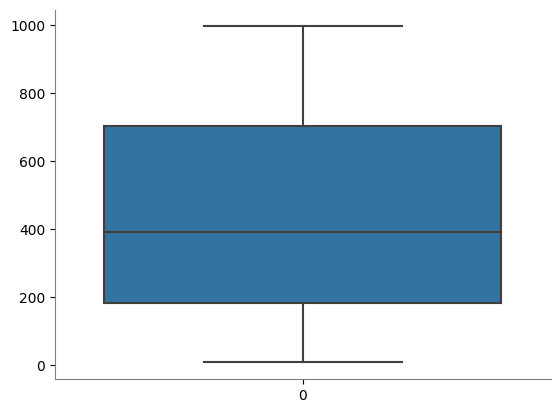

In [7]:
sns.boxplot(df['Number of products sold'])
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('gray')
ax.spines['bottom'].set_color('gray')
ax.spines['left'].set_linewidth(0.8)
ax.spines['bottom'].set_linewidth(0.8)


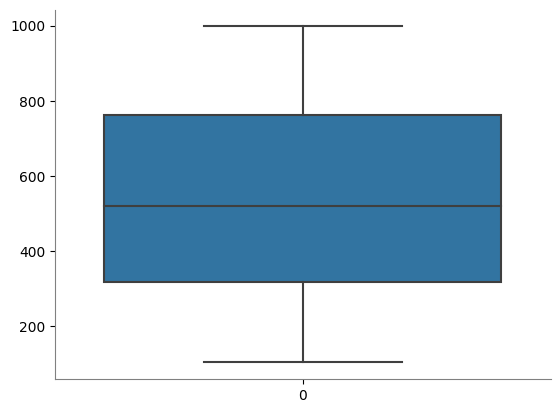

In [8]:
sns.boxplot(df['Costs'])
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('gray')
ax.spines['bottom'].set_color('gray')
ax.spines['left'].set_linewidth(0.8)
ax.spines['bottom'].set_linewidth(0.8)


In [9]:
df['Fulfillment Rate'] = (df['Availability'] / df['Order quantities']) * 100
df['Fulfillment Rate'] = df['Fulfillment Rate'].apply(lambda x: min(x, 100))
df['Fulfillment Rate'].mean()

73.64799388293595

**Disclaimer**

The Fulfillment Rate in this analysis is calculated using the Availability column as a proxy for the number of items successfully shipped actual shipping data is not available.

**Interpretation**

The average fulfillment rate is around 73%, which is considered poor if compared to industry benchmarks.
Common causes of low fulfillment include low utilization rate, stock issues, shipping delays, and long lead times.
Further analysis is required to confirm which factors are most responsible in this dataset.

In [10]:
df.groupby('Stock levels')['Fulfillment Rate'].mean().nsmallest(15)

Stock levels
36     7.058824
80    10.416667
51    13.750000
42    15.498366
33    18.032787
59    18.750000
12    22.535211
55    28.813559
27    32.352941
14    42.168675
60    48.403361
0     50.000000
45    50.474100
64    50.598086
93    50.961538
Name: Fulfillment Rate, dtype: float64

In [11]:
df.groupby('Stock levels')[['Availability', 'Order quantities']].mean()


,Availability,Order quantities
Stock levels,,
0,29.000000,58.000000
1,65.000000,54.500000
2,74.000000,78.000000
4,62.666667,49.333333
5,48.600000,45.600000
...,...,...
95,62.000000,27.000000
96,53.500000,55.500000
97,17.500000,10.000000


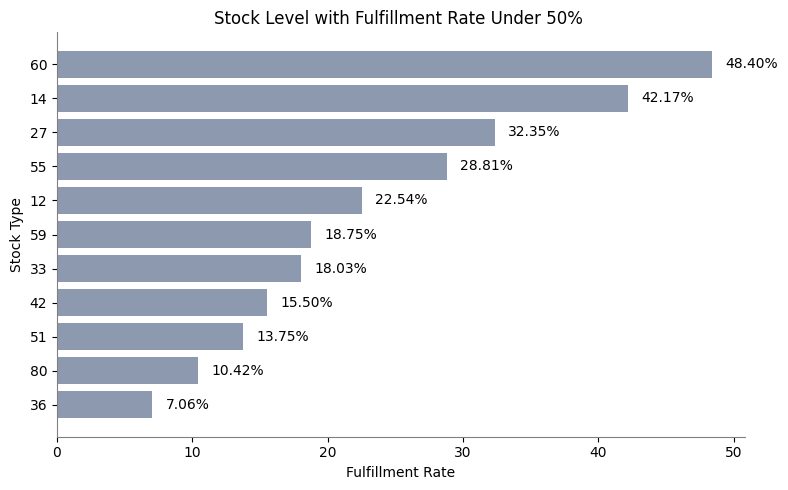

In [12]:
fulfillment_rate_by_stock_level = df.groupby('Stock levels')['Fulfillment Rate'].mean().nsmallest(11).reset_index()
fulfillment_rate_by_stock_level['Stock levels'] = fulfillment_rate_by_stock_level['Stock levels'].astype(str)

plt.figure(figsize=(8, 5))
bars = plt.barh(fulfillment_rate_by_stock_level['Stock levels'], fulfillment_rate_by_stock_level['Fulfillment Rate'], color='#8D99AE')
plt.title('Stock Level with Fulfillment Rate Under 50% ')
plt.xlabel('Fulfillment Rate')
plt.ylabel('Stock Type')

ax = plt.gca()
for side in ['top', 'right']:
    ax.spines[side].set_visible(False)
ax.spines['left'].set_color('gray')
ax.spines['bottom'].set_color('gray')
ax.spines['left'].set_linewidth(0.8)
ax.spines['bottom'].set_linewidth(0.8)

for bar in bars:
    width = bar.get_width()
    plt.text(
        width + 1,
        bar.get_y() + bar.get_height() / 2,
        f'{width:.2f}%',
        va='center',
        fontsize=10,
        color='black'
    )


plt.grid(False)
plt.tight_layout()
plt.show()

**Stock Level with Fulfillment Rate Under 50%**

More than 10 stock levels have fulfillment rates below 50%.
For example:

Stock level 36: Fulfillment rate 7.06%

Stock level 80: Fulfillment rate 10.42%

Stock level 51: Fulfillment rate 13.75%

**Interpretation**

There doesn’t appear to be a strong pattern between stock level and fulfillment rate.
Even high stock levels (like 80, 60, 59, 55) still show low fulfillment performance.

In [13]:
df.groupby('Supplier name')['Fulfillment Rate'].mean()

Supplier name
Supplier 1    61.816307
Supplier 2    70.703869
Supplier 3    79.151891
Supplier 4    83.580328
Supplier 5    80.474984
Name: Fulfillment Rate, dtype: float64

In [14]:
df.pivot_table(index='Supplier name', values=['Fulfillment Rate', 'Costs'], aggfunc='mean')

,Costs,Fulfillment Rate
Supplier name,,
Supplier 1,574.851139,61.816307
Supplier 2,515.027241,70.703869
Supplier 3,468.800102,79.151891
Supplier 4,521.810418,83.580328
Supplier 5,536.022730,80.474984


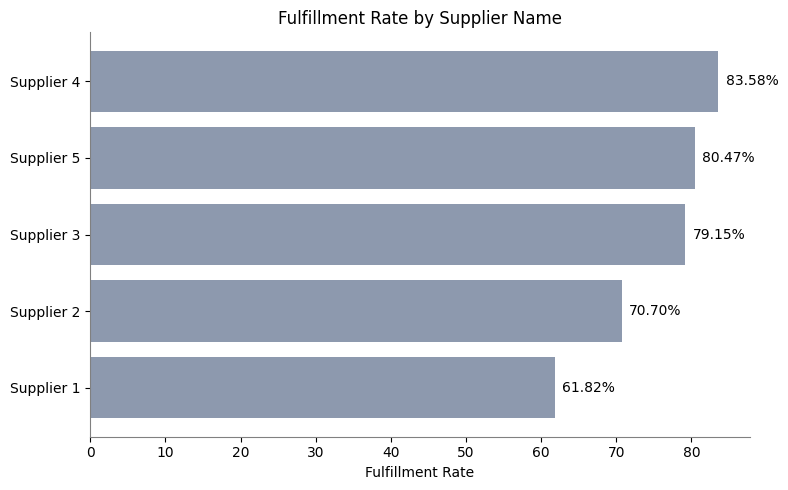

In [15]:
fulfillment_by_supplier = df.groupby('Supplier name')['Fulfillment Rate'].mean().nsmallest(10).reset_index()

plt.figure(figsize=(8, 5))
bars = plt.barh(fulfillment_by_supplier['Supplier name'], fulfillment_by_supplier['Fulfillment Rate'], color='#8D99AE')
plt.title('Fulfillment Rate by Supplier Name')
plt.xlabel('Fulfillment Rate')
plt.ylabel('')

ax = plt.gca()
for side in ['top', 'right']:
    ax.spines[side].set_visible(False)
ax.spines['left'].set_color('gray')
ax.spines['bottom'].set_color('gray')
ax.spines['left'].set_linewidth(0.8)
ax.spines['bottom'].set_linewidth(0.8)

for bar in bars:
    width = bar.get_width()
    plt.text(
        width + 1,
        bar.get_y() + bar.get_height() / 2,
        f'{width:.2f}%',
        va='center',
        fontsize=10,
        color='black'
    )


plt.grid(False)
plt.tight_layout()
plt.show()

In [16]:
df.groupby('Product type')['Fulfillment Rate'].mean()

Product type
cosmetics    78.548511
haircare     72.492366
skincare     71.444941
Name: Fulfillment Rate, dtype: float64

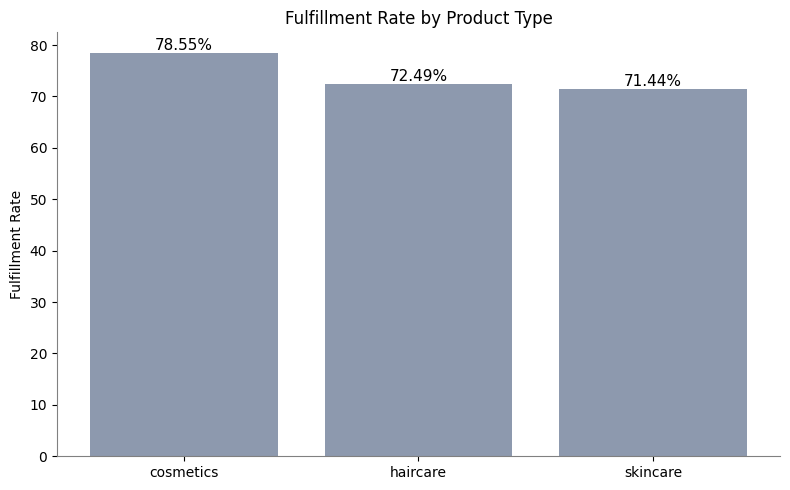

In [17]:
fulfillment_by_product = df.groupby('Product type')['Fulfillment Rate'].mean().reset_index()

plt.figure(figsize=(8, 5))
bars = plt.bar(fulfillment_by_product['Product type'], fulfillment_by_product['Fulfillment Rate'], color='#8D99AE')
plt.title('Fulfillment Rate by Product Type')
plt.xlabel('')
plt.ylabel('Fulfillment Rate')

ax = plt.gca()
for side in ['top', 'right']:
    ax.spines[side].set_visible(False)
ax.spines['left'].set_color('gray')
ax.spines['bottom'].set_color('gray')
ax.spines['left'].set_linewidth(0.8)
ax.spines['bottom'].set_linewidth(0.8)

for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f'{height:.2f}%',
        ha='center', va='bottom', fontsize=11, color='black'
    )

plt.grid(False)
plt.tight_layout()
plt.show()

In [18]:
df

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs,Fulfillment Rate
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075,57.291667
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579,100.000000
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282,38.636364
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159,100.000000
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632,46.428571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,haircare,SKU95,77.903927,65,672,7386.363944,Unknown,15,14,26,...,18,450,26,58.890686,Pending,1.210882,Air,Route A,778.864241,100.000000
96,cosmetics,SKU96,24.423131,29,324,7698.424766,Non-binary,67,2,32,...,28,648,28,17.803756,Pending,3.872048,Road,Route A,188.742141,90.625000
97,haircare,SKU97,3.526111,56,62,4370.916580,Male,46,19,4,...,10,535,13,65.765156,Fail,3.376238,Road,Route A,540.132423,100.000000
98,skincare,SKU98,19.754605,43,913,8525.952560,Female,53,1,27,...,28,581,9,5.604691,Pending,2.908122,Rail,Route A,882.198864,100.000000


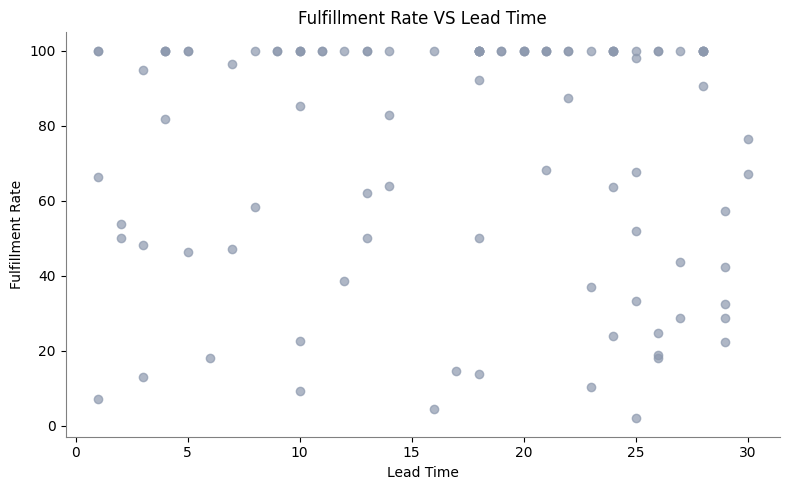

In [19]:
plt.figure(figsize=(8, 5))
plt.scatter(df['Lead time'], df['Fulfillment Rate'], color='#8D99AE', alpha=0.7)
plt.title('Fulfillment Rate VS Lead Time')
plt.xlabel('Lead Time')
plt.ylabel('Fulfillment Rate')

ax = plt.gca()
for side in ['top', 'right']:
    ax.spines[side].set_visible(False)
ax.spines['left'].set_color('gray')
ax.spines['bottom'].set_color('gray')
ax.spines['left'].set_linewidth(0.8)
ax.spines['bottom'].set_linewidth(0.8)

plt.grid(False)
plt.tight_layout()
plt.show()

**Fulfillment Rate VS Lead Time**

Scatterplot analysis shows no clear direction or trend between Fulfillment Rate and Lead Time.

**Interpretation**

There is no strong correlation between Fulfillment Rate and Lead Time.

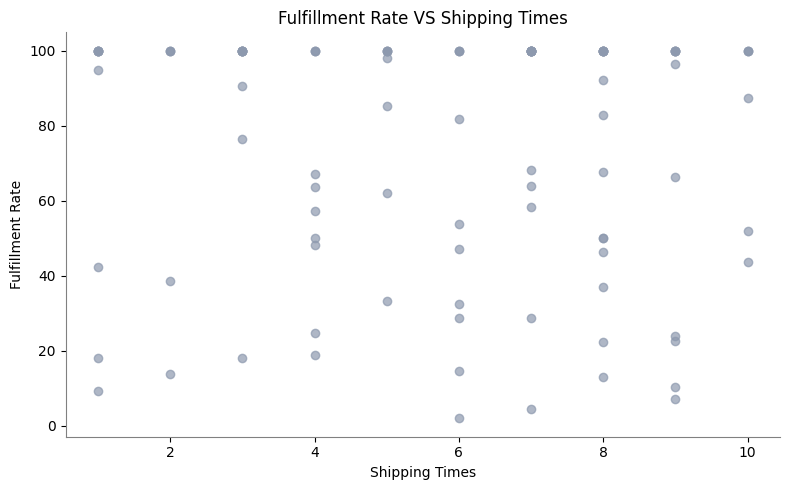

In [20]:
plt.figure(figsize=(8, 5))
plt.scatter(df['Shipping times'], df['Fulfillment Rate'], color='#8D99AE', alpha=0.7)
plt.title('Fulfillment Rate VS Shipping Times')
plt.xlabel('Shipping Times')
plt.ylabel('Fulfillment Rate')

ax = plt.gca()
for side in ['top', 'right']:
    ax.spines[side].set_visible(False)
ax.spines['left'].set_color('gray')
ax.spines['bottom'].set_color('gray')
ax.spines['left'].set_linewidth(0.8)
ax.spines['bottom'].set_linewidth(0.8)

plt.grid(False)
plt.tight_layout()
plt.show()

**Fulfillment Rate VS Shipping Times**

Same result as above scatterplot between Fulfillment Rate and Shipping Times appears scattered with no clear pattern.

**Interpretation**

There is no strong correlation between Fulfillment Rate and Shipping Times.



In [21]:
df.groupby('Location')['Fulfillment Rate'].mean()

Location
Bangalore    82.567664
Chennai      74.066477
Delhi        81.417242
Kolkata      66.376624
Mumbai       68.935348
Name: Fulfillment Rate, dtype: float64

In [22]:
df.groupby('Routes')['Fulfillment Rate'].mean()

Routes
Route A    77.702050
Route B    72.483256
Route C    67.086539
Name: Fulfillment Rate, dtype: float64

In [23]:
df.pivot_table(index='Routes', columns='Location', values=['Fulfillment Rate'], aggfunc='mean')

Fulfillment Rate                                             
Location        Bangalore    Chennai       Delhi    Kolkata     Mumbai
Routes                                                                
Route A         83.406177  70.410890   78.730159  83.664964  64.994940
Route B         67.187500  71.885727  100.000000  39.544228  88.782609
Route C        100.000000  82.378533   42.535948  71.957672  47.726209

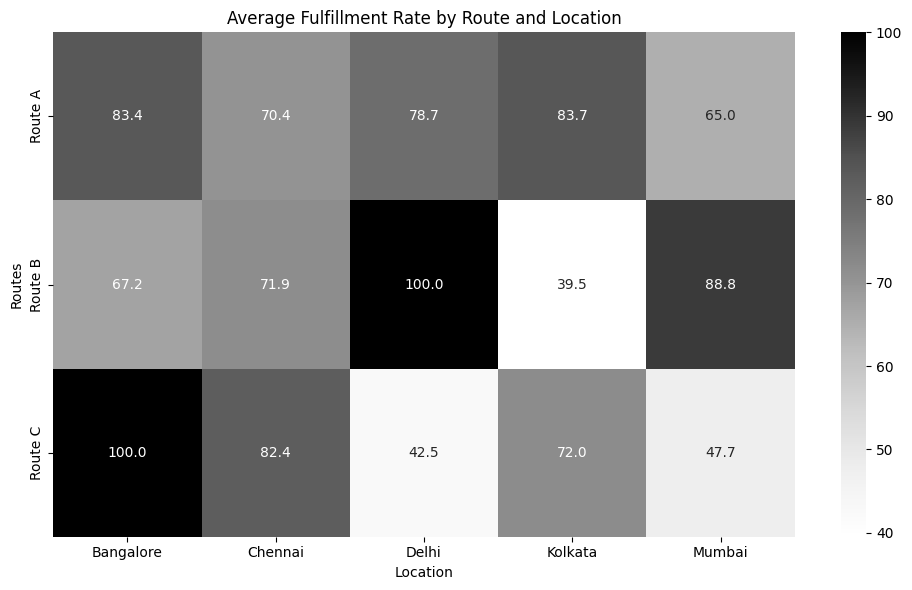

In [24]:
pivot_table = df.pivot_table(index='Routes', columns='Location', values='Fulfillment Rate', aggfunc='mean')

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, fmt=".1f", cmap="Greys")
plt.title('Average Fulfillment Rate by Route and Location')
plt.xlabel('Location')
plt.ylabel('Routes')
plt.tight_layout()
plt.show()

In [25]:
df.pivot_table(index='Shipping carriers', values=['Fulfillment Rate', 'Shipping times', 'Shipping costs'], aggfunc='mean')

,Fulfillment Rate,Shipping costs,Shipping times
Shipping carriers,,,
Carrier A,76.819901,5.554923,6.142857
Carrier B,70.784433,5.509247,5.302326
Carrier C,74.831432,5.599292,6.034483


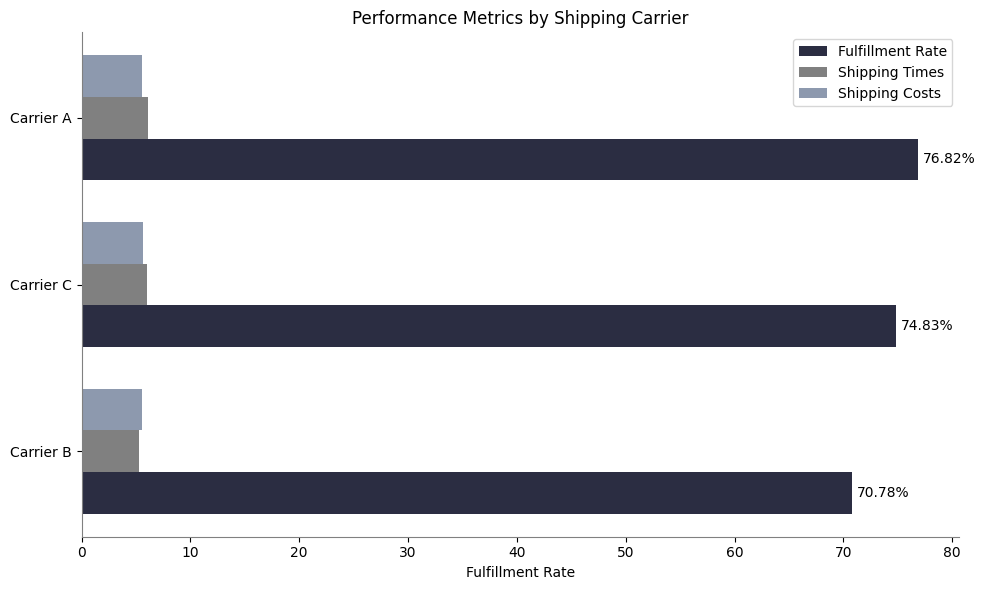

In [26]:
pivot = df.pivot_table(
    index='Shipping carriers',
    values=['Fulfillment Rate', 'Shipping times', 'Shipping costs'],
    aggfunc='mean'
).reset_index()

pivot = pivot.sort_values('Fulfillment Rate', ascending=True).reset_index(drop=True)

y = np.arange(len(pivot))
height = 0.25

plt.figure(figsize=(10, 6))
plt.barh(y - height, pivot['Fulfillment Rate'], height=height, label='Fulfillment Rate', color='#2B2D42')
plt.barh(y, pivot['Shipping times'], height=height, label='Shipping Times', color='grey')
plt.barh(y + height, pivot['Shipping costs'], height=height, label='Shipping Costs', color='#8D99AE')

for i, val in enumerate(pivot['Fulfillment Rate']):
    plt.text(val + 0.5, y[i] - height, f'{val:.2f}%', va='center', fontsize=10)

plt.yticks(y, pivot['Shipping carriers'])
plt.xlabel('Fulfillment Rate')
plt.title('Performance Metrics by Shipping Carrier')
plt.legend()

ax = plt.gca()
for side in ['top', 'right']:
    ax.spines[side].set_visible(False)
ax.spines['left'].set_color('gray')
ax.spines['bottom'].set_color('gray')
ax.spines['left'].set_linewidth(0.8)
ax.spines['bottom'].set_linewidth(0.8)

plt.grid(False)
plt.tight_layout()
plt.show()

In [27]:
numeric_df = df.select_dtypes(include=[np.number])
numeric_df.corr()

,Price,Availability,Number of products sold,Revenue generated,Stock levels,Lead times,Order quantities,Shipping times,Shipping costs,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Defect rates,Costs,Fulfillment Rate
Price,1.000000,0.019083,0.005739,0.038424,0.078261,0.044855,0.095819,0.071942,0.058543,0.152185,-0.124575,-0.301313,-0.184123,-0.147247,0.088501,-0.058021
Availability,0.019083,1.000000,0.087496,-0.075170,-0.025900,0.170439,0.143769,-0.051377,-0.044179,-0.156669,0.050134,0.065333,0.134652,0.040626,-0.027315,0.748915
Number of products sold,0.005739,0.087496,1.000000,-0.001641,0.022189,-0.046419,0.015992,0.087315,0.044285,0.041230,0.187945,-0.048939,0.034284,-0.082726,-0.036951,0.024232
Revenue generated,0.038424,-0.075170,-0.001641,1.000000,-0.158480,-0.057296,0.029422,-0.109211,-0.072892,-0.014178,-0.037441,0.014073,-0.214025,-0.125335,0.027252,-0.096614
Stock levels,0.078261,-0.025900,0.022189,-0.158480,1.000000,0.072571,-0.111455,-0.094883,0.072907,0.067880,0.043763,-0.050592,0.033243,-0.149478,-0.012088,0.042264
Lead times,0.044855,0.170439,-0.046419,-0.057296,0.072571,1.000000,0.105459,-0.045156,-0.120746,-0.002818,-0.145324,0.003364,-0.024441,0.015681,0.243686,0.017730
Order quantities,0.095819,0.143769,0.015992,0.029422,-0.111455,0.105459,1.000000,-0.002561,0.004261,-0.086189,-0.086567,0.112347,-0.026784,0.018986,0.167306,-0.339885
Shipping times,0.071942,-0.051377,0.087315,-0.109211,-0.094883,-0.045156,-0.002561,1.000000,0.045108,-0.022214,-0.060470,-0.016953,0.029132,-0.036673,-0.045541,-0.047941
Shipping costs,0.058543,-0.044179,0.044285,-0.072892,0.072907,-0.120746,0.004261,0.045108,1.000000,0.029680,-0.097979,-0.005653,0.005984,0.083139,0.051671,-0.098890
Lead time,0.152185,-0.156669,0.041230,-0.014178,0.067880,-0.002818,-0.086189,-0.022214,0.029680,1.000000,0.212676,0.026756,-0.121999,0.297099,0.045219,-0.051061


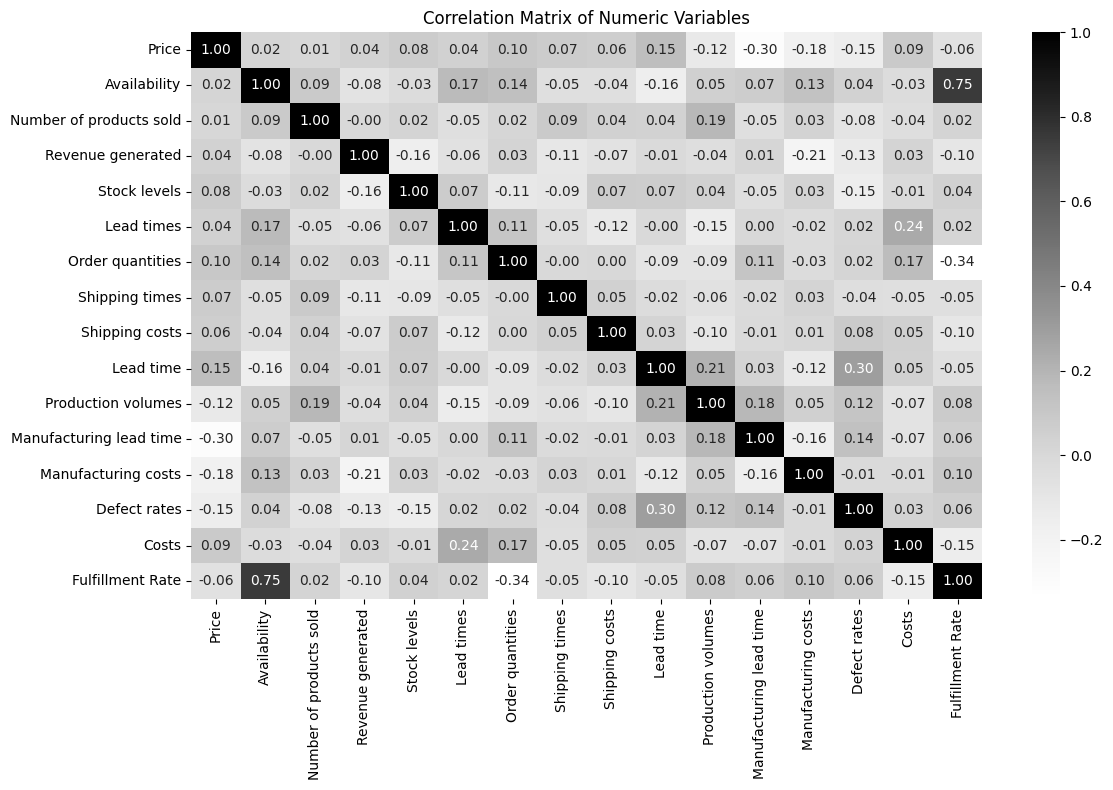

In [28]:
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, fmt='.2f', cmap='Greys', cbar=True)
plt.title('Correlation Matrix of Numeric Variables')
plt.tight_layout()
plt.show()

**Interpretation**

Fulfillment Rate has no strong correlation with any numerical feature in the dataset, except Availability, which is expected since it is used to calculate Fulfillment Rate.



**Final Insight**

Based on the analysis, there are no strong indicators that low Fulfillment Rate is caused by stock levels, lead time, or shipping time.
Even products with high stock still have low fulfillment.
Lead time and shipping time have correlation values of less than 1% with fulfillment rate.

A potential cause could be low utilization rate, which was not analyzed earlier due to data limitations.

Further investigation is needed to confirm this hypothesis and guide operational improvements.